# Tensorflow playground

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters.

# Fit history - charts from epochs

In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/ann/banknotes.csv')

X = scale(df.drop('class', axis=1).values)
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [56]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Save history from fit method

In [ ]:
history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Text(0.5,1,'Test accuracy: 72.1 %')

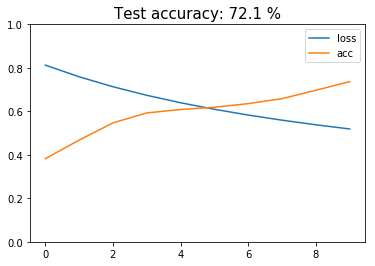

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

# Inner layer representation

How to visualize the activations of inner layers.
What my model is doing? - dimensional reduction ?

In [70]:
from keras.optimizers import RMSprop

K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

### Model detail

In [71]:
print(model.summary())
print(model.layers)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None
[<keras.layers.core.Dense object at 0x0000017688D1ABE0>, <keras.layers.core.Dense object at 0x0000017688D1AC50>, <keras.layers.core.Dense object at 0x0000017688D1A8D0>]


### Feature function (input of 1.st layer vs output of 2.nd => feature separating)

In [72]:
inp = model.layers[0].input
out = model.layers[1].output
print(inp)
print(out)

Tensor("dense_1_input:0", shape=(?, 4), dtype=float32)
Tensor("dense_2/Relu:0", shape=(?, 2), dtype=float32)


In [73]:
#Create feature function
features_function = K.function([inp], [out])

412/412 [==============================] - 0s 19us/step


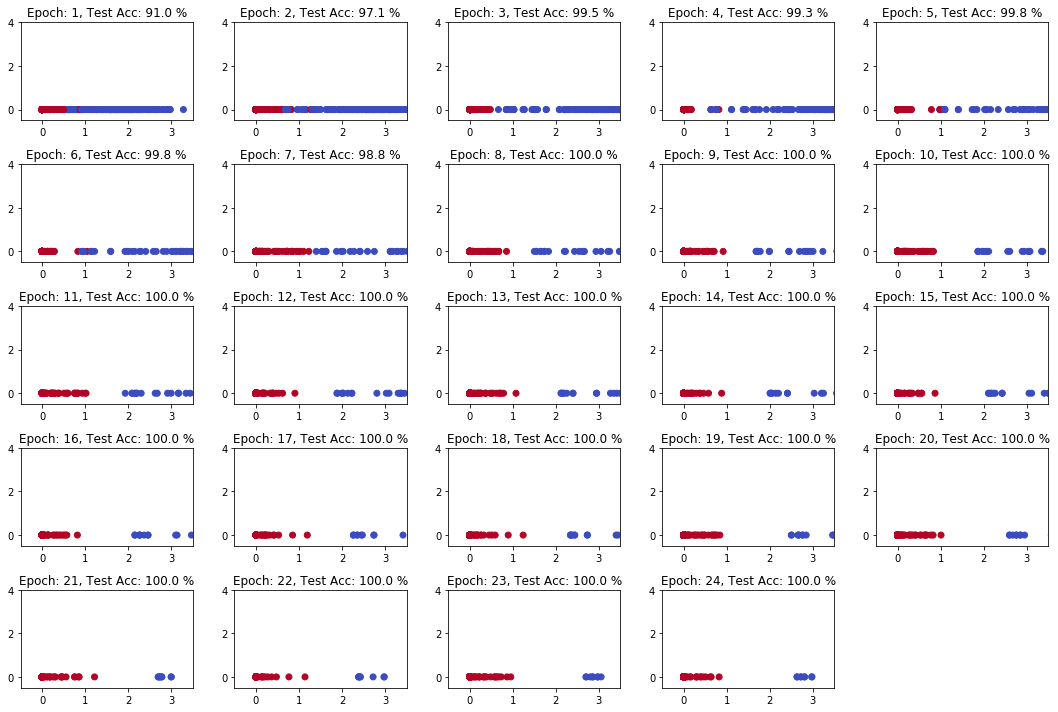

In [74]:
#Plot feature function
plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

#Looks different for every run - random init
plt.tight_layout()

# Callbacks

In [52]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load dataset

In [ ]:
df = pd.read_csv('./data/ann/wines.csv')
y = df['Class']
y_cat = pd.get_dummies(y)
X = df.drop('Class', axis=1)

sc = StandardScaler()
Xsc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

Create callbacks:
- save model after each epoch
- stop if val_loss do not change
- tensorboard

In [53]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

folder = r'D:/ML/Tutorials/Demo/data/ann'

checkpointer = ModelCheckpoint(filepath= folder +"/weights.{epoch:04d}-{val_loss:.2f}.hdf5",
                               verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')
tensorboard = TensorBoard(log_dir= folder + '/tensorboard/')

Fit - set callbacks

In [54]:
K.clear_session()

model = Sequential()
model.add(Dense(8, input_shape=(13,), activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          #callbacks
          callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
 - 0s - loss: 0.6460 - acc: 0.7177 - val_loss: 0.2175 - val_acc: 0.9630

Epoch 00001: val_loss improved from inf to 0.21749, saving model to D:/ML/Tutorials/Demo/data/ann/weights.0001-0.22.hdf5
Epoch 2/20
 - 0s - loss: 0.2192 - acc: 0.9113 - val_loss: 0.1600 - val_acc: 0.9444

Epoch 00002: val_loss improved from 0.21749 to 0.16004, saving model to D:/ML/Tutorials/Demo/data/ann/weights.0002-0.16.hdf5
Epoch 3/20
 - 0s - loss: 0.0978 - acc: 0.9677 - val_loss: 0.0903 - val_acc: 0.9815

Epoch 00003: val_loss improved from 0.16004 to 0.09034, saving model to D:/ML/Tutorials/Demo/data/ann/weights.0003-0.09.hdf5
Epoch 4/20
 - 0s - loss: 0.0542 - acc: 0.9919 - val_loss: 0.0584 - val_acc: 0.9815

Epoch 00004: val_loss improved from 0.09034 to 0.05837, saving model to D:/ML/Tutorials/Demo/data/ann/weights.0004-0.06.hdf5
Epoch 5/20
 - 0s - loss: 0.0360 - acc: 0.9919 - val_loss: 0.1091 - val_acc: 0.9815

Epoch 00005: val_loss did not improve f

# Tensorboard

Jupyter notebook -> new -> terminal

write: tensorboard --logdir 'D:/ML/Tutorials/Demo/data/ann/tensorboard'

browser run: localhost:6006 (or different url shown in terminal)

# ML vs ANN

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


df = pd.read_csv('./data/preprocessing/diabetes.csv')

sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
    test_size = 0.2, 
    random_state = 22)

### ML

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    
    y_pred = mod.predict(X_test)
    y_test_class = np.argmax(y_test, axis=1)
    
    print("="*80)
    print(mod)
    print("-"*80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class,
                                                         y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--------------------------------------------------------------------------------
Accuracy score: 0.734
Confusion Matrix:
[[88 12]
 [29 25]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion Matrix:
[[89 11]
 [32 22]]

GaussianNB(priors=None)
------------------------------------------------

### ANN

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(input_dim = 8, units = 32, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 2, activation='softmax'))

model.compile(Adam(lr=0.05),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, validation_split=0.1, verbose=2)

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 1s - loss: 0.5634 - acc: 0.7337 - val_loss: 0.6055 - val_acc: 0.7581
Epoch 2/20
 - 0s - loss: 0.4722 - acc: 0.7645 - val_loss: 0.5192 - val_acc: 0.7419
Epoch 3/20
 - 0s - loss: 0.4656 - acc: 0.7808 - val_loss: 0.5001 - val_acc: 0.7742
Epoch 4/20
 - 0s - loss: 0.4461 - acc: 0.7935 - val_loss: 0.5132 - val_acc: 0.7903
Epoch 5/20
 - 0s - loss: 0.4484 - acc: 0.7826 - val_loss: 0.5716 - val_acc: 0.7581
Epoch 6/20
 - 0s - loss: 0.4657 - acc: 0.7754 - val_loss: 0.6501 - val_acc: 0.7742
Epoch 7/20
 - 0s - loss: 0.4341 - acc: 0.7826 - val_loss: 0.5487 - val_acc: 0.7581
Epoch 8/20
 - 0s - loss: 0.4161 - acc: 0.7989 - val_loss: 0.5506 - val_acc: 0.7581
Epoch 9/20
 - 0s - loss: 0.4136 - acc: 0.7917 - val_loss: 0.5614 - val_acc: 0.7258
Epoch 10/20
 - 0s - loss: 0.4182 - acc: 0.7953 - val_loss: 0.6932 - val_acc: 0.7581
Epoch 11/20
 - 0s - loss: 0.4038 - acc: 0.8025 - val_loss: 0.6049 - val_acc: 0.7903
Epoch 12/20
 - 0s - loss: 0.3869 - acc: 

In [92]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

confusion_matrix(y_test_class, y_pred_class)

array([[97,  3],
       [46,  8]], dtype=int64)